In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [2]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

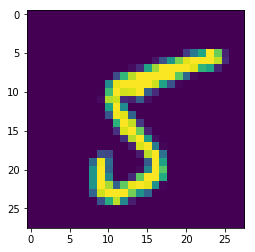

In [3]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28,28))

# Обработка входных данных

In [4]:
def normalization(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0) + 0.00001
    return (x - mean) / std

# нормализация и добавление единичной колонки для w0
train['data'] = np.hstack([np.ones((train['data'].shape[0], 1)), normalization(train['data'])])
test_no_lables['data'] = np.hstack([np.ones((test_no_lables['data'].shape[0], 1)), normalization(test_no_lables['data'])])

# разделение входных данных на обучающие и валидационные
x_train, x_test, y_train, y_test = train_test_split(train['data'], train['labels'], test_size=0.2, shuffle=False)
np.random.seed(10)

# изменение меток
y_train = list(map(lambda x: 1 if x==6 else -1, y_train))
y_test = list(map(lambda x:1 if x==6 else -1, y_test))

# объявление весов случайным образом
w = np.random.normal(scale=0.0001, size=x_train.shape[1])
# эта
p1 = 0.0001
# лямбда
p2 = 0.0001

# Методы для обработки данных

In [5]:
# сигмоида
def sigmoid(arg):
    return 1 / (1 + np.exp(-arg))

# классификация
def predict(x, dtype):
    y = []
    for i in range(x.shape[0]):
        pred = sigmoid(np.dot(w.T, x[i]))
        if dtype == 1:
            y.append(pred)
        elif pred >= 0.5:
            y.append(1)
        else:
            y.append(-1)
    return y

# сохранение в формате csv
def toCSV(x):
    y = predict(x, 1)
    i = 0
    with open('solution.csv', 'w') as fout:
        print("Id,Prediction", file=fout)
        for i in range(len(y)):
            print(i, y[i], sep=',', file=fout)

# расчет функции потерь
def log_loss(y, x, w):
    logloss = 0
    for i in range(len(y)):
        logloss += math.log(1 + np.exp(-y[i] * np.dot(w.T, x[i])))
    return logloss / len(y)


# Запуск эпох

In [6]:
train_ll = []
train_acc = []
test_ll = []
test_acc = []

epochs = 100
for i in tqdm.tqdm_notebook(range(epochs)):
    for k in range(x_train.shape[0]):
        j = np.random.randint(0, len(x_train))
        # расчет градиентов
        gd = - (y_train[j] * x_train[j] / (1 + np.exp(y_train[j] * np.dot(w.T, x_train[j])))) + p2 * w
        w = w - p1 * gd
    # расчет ошибок и точностей
    train_ll.append(log_loss(y_train, x_train, w))
    train_acc.append(accuracy_score(predict(x_train, 2), y_train))
    test_ll.append(log_loss(y_test, x_test, w))
    test_acc.append(accuracy_score(predict(x_test, 2), y_test))

# вывод ошибок и точностей
print("Train: logloss=" + str(train_ll[len(train_ll)-1]) + " accuracy=" + str(train_acc[len(train_acc)-1]))
print("Test: logloss=" + str(test_ll[len(test_ll)-1]) + " accuracy=" + str(test_acc[len(test_acc)-1]))


Train: logloss=0.03851937815185321 accuracy=0.98725
Test: logloss=0.05376446045757875 accuracy=0.983


# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

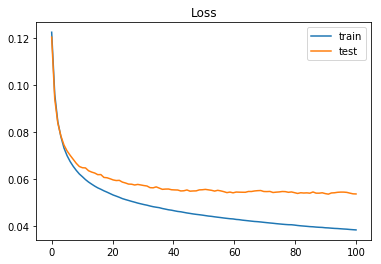

In [7]:
x = np.linspace(0, epochs, num=epochs)

plt.title('Loss')
plt.plot(x, train_ll, label='train')
plt.plot(x, test_ll, label='test')
plt.legend()

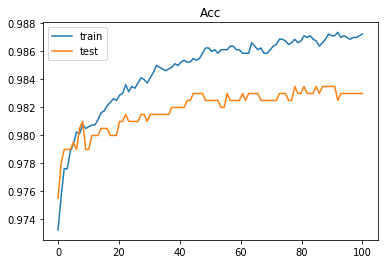

In [8]:
plt.title('Acc')
plt.plot(x, train_acc, label='train')
plt.plot(x, test_acc, label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [9]:
# импортирование в csv
toCSV(test_no_lables['data'])